In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

data = [[np.random.randn()**2,np.random.choice(['A','A','B']), np.random.randint(0,3)] for i in range(10)] \
        + [[np.random.randn()-1,np.random.choice(['A','B','C']), np.random.randint(2,5)] for i in range(10)] \
        + [[np.random.randn()-1,np.random.choice(['A','C','C','C']), np.random.randint(2,4)+np.random.randint(0,2)+np.random.randint(0,1)] for i in range(10)]
df = pd.DataFrame(data, columns=['float','letter','int'])
df

,float,letter,int
0,0.318291,A,1
1,0.002169,A,0
2,1.118361,A,2
3,1.789734,A,0
4,0.101208,A,0
5,0.014060,A,0
6,0.000206,B,1
7,0.073817,B,2
8,5.690224,A,1
9,0.055139,A,1


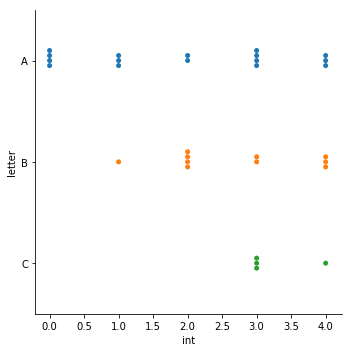

In [2]:
sns.catplot(x="int", y="letter", kind="swarm", data=df)

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


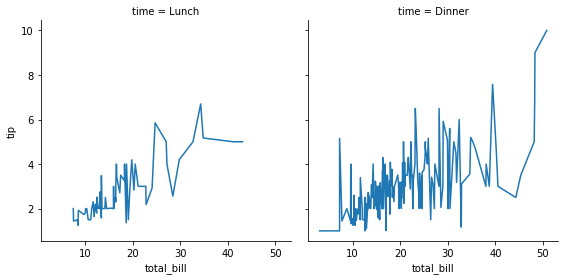

In [4]:
sns.relplot(x="total_bill", y="tip", col="time", height=4, kind="line", estimator=None, data=tips)

In [26]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['a0', 'a1', 'a2', 'a3'],
                    'B': ['b0', 'b1', 'b2', 'b3'],
                    'C': ['c0', 'c1', 'c2', 'c3'],
                    'D': ['d0', 'd1', 'd2', 'd3']},
                    index=[0, 1, 2, 3])
df3 = pd.concat([df1,df2], join='inner')
df3

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [27]:
df3.iloc[1]

A    A1
B    B1
C    C1
D    D1
Name: 1, dtype: object

['a', 'b', 'c']
